In [ ]:
!pip install pycaret

  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
import pandas as pd
import numpy as np
import spacy
import re
from pycaret.classification import *
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reviews = pd.read_csv("/IMDB_Dataset.csv")

Como podemos ver, o dataset está balanceado

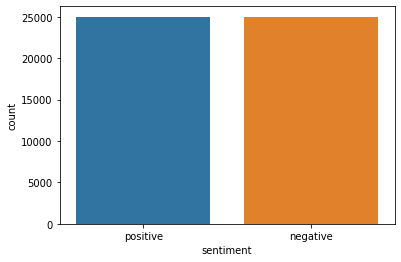

In [ ]:
sns.countplot(reviews['sentiment'])

Fazendo a função que limpa as reviews


In [ ]:
#objeto spacy
spc_nlp = spacy.load("en")
#loading stopwords
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def clean_text(text):
  htm_tags_re = re.compile('<.*?>')
  no_html_text = re.sub(htm_tags_re, '', text)
  word_list = re.findall(r'[a-z,A-Z]\w+', no_html_text)
  word_list_no_stopwords = [w.lower() for w in word_list if w.lower() not in stopwords]
  doc = spc_nlp(" ".join(word_list_no_stopwords))
  tokens = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in doc]
  clean_text = " ".join(tokens)
  return clean_text

In [ ]:
reviews['clean_text'] = reviews['review'].progress_apply(clean_text)

100%|██████████| 50000/50000 [20:00<00:00, 41.67it/s]


In [ ]:
reviews.to_csv("clean_imdb.csv")

In [ ]:
vectorizer = CountVectorizer(ngram_range =(1,3), max_features = 500)
X = vectorizer.fit_transform(reviews['clean_text']).toarray()
cols = vectorizer.get_feature_names()
feature_df = pd.DataFrame(X,columns=cols)
feature_df['sentiment'] = pd.get_dummies(reviews['sentiment'])['positive']

In [ ]:
feature_df.to_csv("features_sentiment.csv")

In [ ]:
feature_df = pd.read_csv("features_sentiment.csv", index='Unnamed: 0')

In [ ]:
feature_df.head()

,able,absolutely,act,acting,action,actor,actors,actress,actually,add,age,ago,allow,amazing,american,apparently,appear,art,ask,attempt,attention,audience,avoid,away,awful,bad,base,basically,beautiful,begin,believe,best,better,big,bit,black,blood,body,book,bore,...,video,view,viewer,violence,voice,wait,walk,want,war,wasn,waste,waste time,watch,watch movie,way,white,wife,will,win,wish,woman,women,wonder,wonderful,word,words,work,world,worse,worst,worth,wouldn,write,writer,wrong,year,years,yes,young,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,0,0,0,0,0,0,0,0,3,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

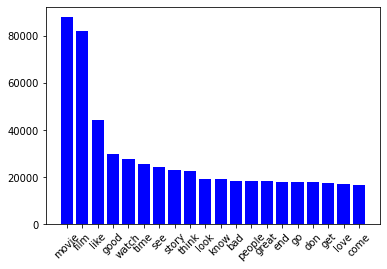

In [ ]:
count = feature_df.sum(axis = 0)
count = count[:len(count)-1]
plt_count = count.sort_values(ascending=False)[:20]
plt.bar(plt_count.index,plt_count, color='b')
plt.xticks(rotation=45)

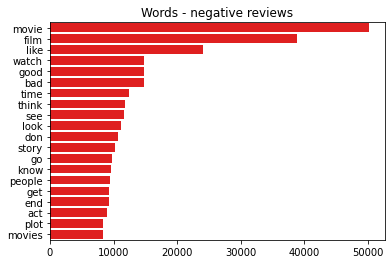

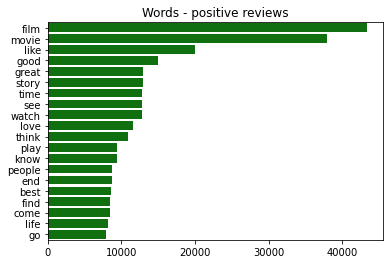

In [ ]:
positive_df = feature_df[feature_df['sentiment'] == 1] 
negative_df = feature_df[feature_df['sentiment'] == 0] 
positive_w = positive_df.sum(axis = 0)
positive_w = positive_w[:len(positive_w)-1]
negative_w = negative_df.sum(axis = 0)
negative_w = negative_w[:len(negative_w)-1]
plt_p_count = positive_w.sort_values(ascending=False)[:20]
plt_n_count = negative_w.sort_values(ascending=False)[:20]
ax2 = sns.barplot(y = plt_n_count.index,x = plt_n_count, color='r')
ax2.set_title("Words - negative reviews")
plt.show()
ax = sns.barplot(y = plt_p_count.index,x = plt_p_count, color='g')
ax.set_title("Words - positive reviews")
plt.show()

In [ ]:
cl_IMDB = setup(data = feature_df, target = 'sentiment') 

Setup Succesfully Completed!


,Description,Value
0,session_id,6949
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(50000, 502)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,498
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8300,0.9086,0.8562,0.8138,0.8344,0.6601,0.6610,57.0939
1,Logistic Regression,0.8262,0.9039,0.8385,0.8185,0.8284,0.6525,0.6527,16.6872
2,Light Gradient Boosting Machine,0.8216,0.9039,0.8397,0.8104,0.8248,0.6432,0.6437,10.0051
3,Ridge Classifier,0.8145,0.0000,0.8384,0.8002,0.8188,0.6290,0.6298,16.4662
4,SVM - Linear Kernel,0.8083,0.0000,0.7908,0.8294,0.8019,0.6166,0.6275,32.8141
5,Extra Trees Classifier,0.8072,0.8860,0.8115,0.8046,0.8080,0.6144,0.6145,41.1671
6,Linear Discriminant Analysis,0.8071,0.8815,0.8299,0.7937,0.8114,0.6141,0.6148,155.2147
7,Gradient Boosting Classifier,0.7974,0.8819,0.8530,0.7677,0.8081,0.5948,0.5985,117.6012
8,Ada Boost Classifier,0.7970,0.8789,0.8442,0.7714,0.8062,0.5939,0.5967,40.0051
9,Extreme Gradient Boosting,0.7946,0.8802,0.8581,0.7615,0.8069,0.5893,0.5942,136.7022
